# Machine-Learning-and-Statistics-Project 2020

***

##  Project 2020


In this project you must create a web service that uses machine learning to make predictions
based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.
1

## Introduction

Create a web service that uses machine learning to make predictions based on the data set powerproduction.
Produce a model that accurately predicts wind turbine power output from wind speed values.
Develop a web service that will respond with predicted power values based on speed values sent and HTTP requests


Power curve of a wind turbine depicts the relationship between output power and hub height wind speed and is an important characteristic of the turbine.  Accurate models of power curves can play an important role in improving the performance of wind energy based systems. This notebook presents a detailed review of different approaches for modelling of the wind turbine power curve. [1]

 In practice, however, wind turbines are never used under ideal conditions, and the empirical power curves could be substantially different from the theoretical ones due to the location of the turbine, air density, wind velocity distribution, wind direction, mechanical and control issues, as well as uncertainties in measurements.[2]


#### Task objectives:
- Research the Power production dataset.
- Explore models
- Determine model to use
- Develop web service

#### Explore the dataset

In [1]:
# Import libraries
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import tensorflow.keras as kr
import numpy as np
import pandas as pd

In [2]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline
# Apply the default seaborn settings
sns.set()

In [3]:
# Import the power production dataset and call it pp
pp = pd.read_csv("powerprod.csv")
print(pp.head())

   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0


In [4]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [5]:
pp.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


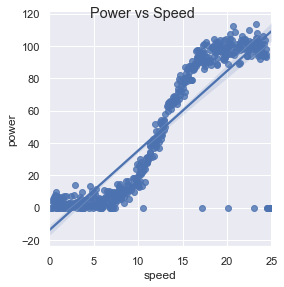

In [6]:
p = sns.pairplot(data=pp,y_vars=['power'],x_vars=['speed'],kind='reg',height=4).fig.suptitle('Power vs Speed')

Observations

Not obvious what model it fits 
- Below approximately 10, power is not generated
- Between 10 & 90 this is a linear correlation
- From 90 upwards power has returned constant values
- there is 0 power generated at certain points - are these outliers and should they be excluded?  

<AxesSubplot:xlabel='speed', ylabel='power'>

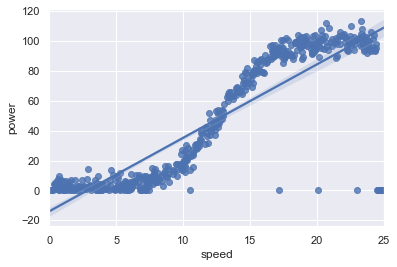

In [32]:
sns.regplot(x="speed", y="power", data=pp)

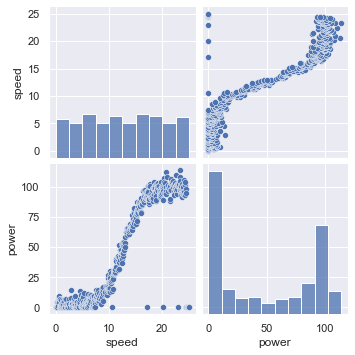

In [33]:
sns.pairplot(pp)

<AxesSubplot:xlabel='speed', ylabel='power'>

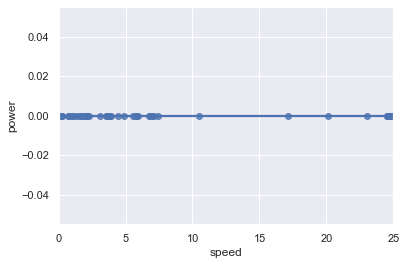

In [12]:
j = pp[pp.power == 0]
sns.regplot(x="speed", y="power", data=j)

 Do we exclude - is it noise or bias?

Will include zeros for moment as part of the dataset

### Linear Regression

In [36]:
inputs = pp[['speed', 'power']]
output = pp['power']

In [37]:
print(inputs.shape)

(500, 2)


In [38]:
print(output.shape)

(500,)


In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(inputs, output)
model = LinearRegression().fit(inputs, output)
r_sq = model.score(inputs, output)
print('coefficient of determination:', r_sq)



coefficient of determination: 1.0


In [41]:
print('intercept:', model.intercept_)

intercept: 0.0


In [42]:
print('slope:', model.coef_)

slope: [-1.2175553e-15  1.0000000e+00]


### Multiple linear regression

In [24]:
import sklearn.linear_model as lm
m = lm.LinearRegression()
m.fit(inputs, output)

LinearRegression()

In [25]:

# Here's our intercept.
m.intercept_

0.0

In [26]:
# Here's our coefficients, in order.
m.coef_

array([-1.2175553e-15,  1.0000000e+00])

In [27]:
# See how good our fit is.
m.score(inputs, output)

1.0

In [28]:
# Calculating the score by hand.
t, u = m.coef_
c = m.intercept_

output_avg = output.mean()

u = ((output - (t * inputs['speed'] + u * inputs['power'] +  c))**2).sum()
v = ((output - output.mean())**2).sum()

1 - (u/v)

1.0

In [29]:
### Using statsmodels

In [30]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(inputs)

# Create a model.
msm = sm.OLS(output, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  power   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.145e+33
Date:                Thu, 31 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:34:47   Log-Likelihood:                 15235.
No. Observations:                 500   AIC:                        -3.046e+04
Df Residuals:                     497   BIC:                        -3.045e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.232e-14   1.34e-15     -9.199      0.0

In [31]:
### Keras

Prepare your data before training a model (by turning it into either NumPy arrays or tf.data.Dataset objects).
Do data preprocessing, for instance feature normalization or vocabulary indexing.
Build a model that turns your data into useful predictions, using the Keras Functional API.
Train your model with the built-in Keras fit() method, while being mindful of checkpointing, metrics monitoring, and fault tolerance.
Evaluate your model on a test data and how to use it for inference on new data.
Customize what fit() does, for instance to build a GAN.
Speed up training by leveraging multiple GPUs.
Refine your model through hyperparameter tuning.

[3]

### Data loading & preprocessing

Neural networks process vectorized & standardized representations.

CSV data needs to be parsed, with numerical features converted to floating point tensors and categorical features indexed and converted to integer tensors. Then each feature typically needs to be normalized to zero-mean and unit-variance.

Data loading
Keras models accept three types of inputs:

NumPy arrays,
TensorFlow Dataset objects.
Python generators that yield batches of data.

Data preprocessing with Keras

In general, you should seek to do data preprocessing as part of your model as much as possible

Using Keras preprocessing layers
In Keras, you do in-model data preprocessing via preprocessing layers. 

***

## References
[1] https://www.hindawi.com/journals/jen/2016/8519785/<br>
[2] http://ieeexplore.ieee.org/iel7/5165391/5433168/06894235.pdf <br>
[3] https://keras.io/getting_started/intro_to_keras_for_engineers <br>
[4] https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf <br>

### The End